# LGM_Internship

![](img.png)

## Task 3 : Music Recommendation System
### - by Fena Jain

### Introduction

🎵 The Importance of Music Recommendation Systems: Unlocking Personalized Musical Journeys! 🎧

Music recommendation systems have become a vital component of the modern music landscape, revolutionizing the way we discover and enjoy music. Here's why they are essential:

1. Personalization: Music recommendation systems analyze user preferences, listening habits, and behavior to provide personalized song suggestions. By understanding our unique tastes, these systems introduce us to new artists, genres, and songs that align with our preferences.

2. Discoverability: With an overwhelming amount of music available across various platforms, finding new and exciting music can be challenging. Recommendation systems help us explore diverse music catalogs and unearth hidden gems that we may have never encountered otherwise.

3. Enhanced User Experience: By curating personalized playlists and suggesting songs tailored to our mood or activity, recommendation systems enrich our music listening experience. They help create soundtracks that resonate with our emotions and enhance the enjoyment of specific moments.

4. Efficient Music Curation: For music streaming platforms, recommendation systems enable efficient music curation, ensuring that users remain engaged and satisfied. By delivering relevant suggestions, these systems increase user retention and drive customer loyalty.

5. Music Industry Growth: Music recommendation systems have a profound impact on the music industry, helping independent artists gain exposure and fostering diversity. They promote the discovery of new talent, enabling a fair and inclusive music ecosystem.


### Methodology

Here is a step-by-step methodology for the code:

1. Import the required packages: The necessary packages, such as pandas, numpy, seaborn, matplotlib, and scikit-learn, are imported.

2. Load the dataset: Read the provided CSV files using pandas' `read_csv` function and store them in respective dataframes (`members_data`, `submission_data`, `songs_info`, `songs_data`, `train_data`, `test_data`).

3. Explore the data: Print the shape and columns of each dataframe to understand the size and structure of the data. Use descriptive statistics and visualizations to gain insights into the data, such as count plots and distribution plots.

4. Data preprocessing:
   - Handle missing values: Check for missing values in each dataframe and fill them if necessary. In this code, specific columns like `genre_ids`, `composer`, `lyricist`, and `language` in the `songs_data` dataframe are filled with appropriate values.
   - Rename columns: Modify column names to ensure consistency and clarity. In this code, the column `msno` in the `train_data` dataframe is renamed to `user_id`.
   - Merge dataframes: Combine relevant dataframes based on common columns using the `merge` function. In this code, the `train_data` and `songs_data` dataframes are merged on the `song_id` column.
   - Drop unnecessary columns: Remove columns that are not required for analysis or modeling. In this code, columns like `song_length`, `language`, `source_system_tab`, `source_screen_name`, and `source_type` are dropped from the merged dataframe.
   - Perform text preprocessing: Clean and process text data in columns like `genre_ids`, `artist_name`, `composer`, and `lyricist`. In this code, characters like '|', '/', and spaces are replaced, and the text is converted to lowercase.
   - Create song details column: Combine relevant text columns to create a consolidated column for song details. In this code, columns like `artist_name`, `composer`, and `lyricist` are concatenated to form the `songs_details` column.

5. Remove duplicates: Identify and remove duplicate records from the dataframe. In this code, duplicates are removed based on the `songs_details` column.

6. Calculate similarity matrix: Use the TF-IDF vectorization technique to convert the text data into a numerical matrix representation. Calculate the cosine similarity between the TF-IDF vectors to obtain a similarity matrix.

7. Implement song recommendation: Define a function (`recommend`) that takes a song name as input. Inside the function, find the index of the input song in the dataframe and retrieve its corresponding row from the similarity matrix. Sort the similarities in descending order and select the top similar songs. Print the recommended song names based on similarity.

8. Test the recommendation system: Call the `recommend` function with a specific song name to get the recommended songs.

This methodology provides an overview of the code and the steps involved in preprocessing the data and implementing a song recommendation system based on cosine similarity.

### Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

<h2><font color='black'>Data Description</h2></font>
<p>Describing the dataset provided for the challenge such as different data sources,listening histories, song features, and many other additional information available.Also Providing details on the size of the dataset, the number of users and songs, and then performing the data preprocessing steps.</h4>

In [2]:
members_data=pd.read_csv("members.csv")

In [3]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [4]:
submission_data=pd.read_csv("sample_submission.csv",nrows=20000)
submission_data.head()

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [5]:
songs_info=pd.read_csv("song_extra_info.csv")
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [6]:
songs_data=pd.read_csv("songs.csv",nrows=20000)
songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
train_data=pd.read_csv("train.csv",nrows=20000)
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [8]:
test_data=pd.read_csv("test.csv")
test_data.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [9]:
print(f"The songs_data has {songs_data.shape[0]} rows and {songs_data.shape[1]} columns")
print(f"The songs_extra_info_data  has {songs_info.shape[0]} rows and {songs_info.shape[1]} columns")
print(f"The members_data has {members_data.shape[0]} rows and {members_data.shape[1]} columns")
print(f"The sample_submission_data  has {submission_data.shape[0]} rows and {submission_data.shape[1]} columns")
print(f"The train_data has {train_data.shape[0]} rows and {train_data.shape[1]} columns")
print(f"The test_data has {test_data.shape[0]} rows and {test_data.shape[1]} columns")

The songs_data has 20000 rows and 7 columns
The songs_extra_info_data  has 2295971 rows and 3 columns
The members_data has 34403 rows and 7 columns
The sample_submission_data  has 20000 rows and 2 columns
The train_data has 20000 rows and 6 columns
The test_data has 2556790 rows and 6 columns


In [10]:
print("Columns present in the songs_data are:")
for columns in songs_data.columns:
    print(columns)

Columns present in the songs_data are:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [11]:
print(f"Number of records : {songs_data.shape[0]}")
print(f"Count of distinct song lengths : {len(songs_data.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs_data.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs_data.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs_data.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs_data.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs_data.language.unique())}")

Number of records : 20000
Count of distinct song lengths : 10734
Count of distinct genre ids : 275
Count of distinct artist name : 8378
Count of distinct composer : 8332
Count of distinct lyricist : 3977
Count of distinct languages : 10


In [12]:
songs_data.describe()

,song_length,language
count,2.000000e+04,20000.000000
mean,2.456958e+05,25.946550
std,1.201716e+05,23.223231
min,4.922000e+03,-1.000000
25%,1.997060e+05,3.000000
50%,2.336850e+05,17.000000
75%,2.731360e+05,52.000000
max,4.025318e+06,59.000000


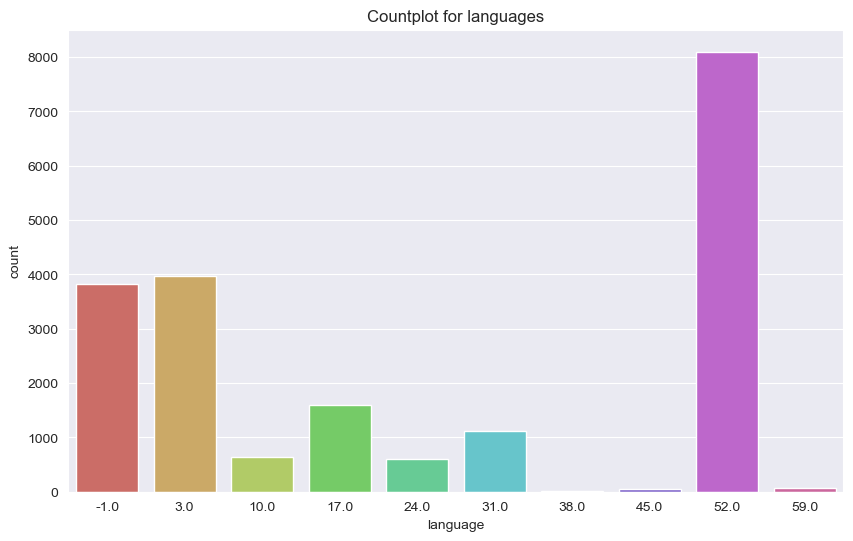

In [13]:
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs_data.language, data = songs_data.language,palette="hls",)
ax.set_title("Countplot for languages")
plt.show()

C:\Users\Fena\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


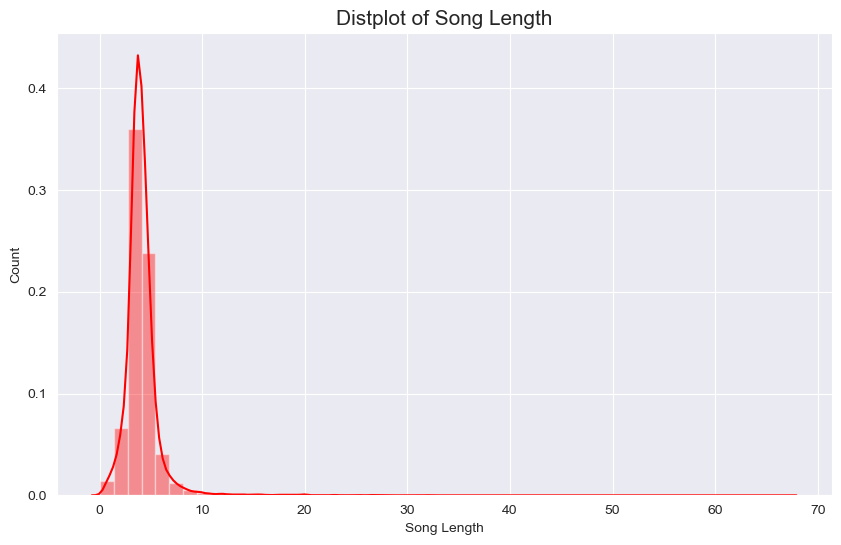

In [14]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
ax = sns.distplot(songs_data.song_length/60000, color='r')
ax.set_title('Distplot of Song Length', fontsize=15)
ax.set(xlabel='Song Length', ylabel='Count')
plt.show()

In [15]:
members_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [16]:
print("Columns present in the members_data are:")
for columns in members_data.columns:
    print(columns)

Columns present in the members_data are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


Text(0.5, 1.0, 'Count plot for gender')

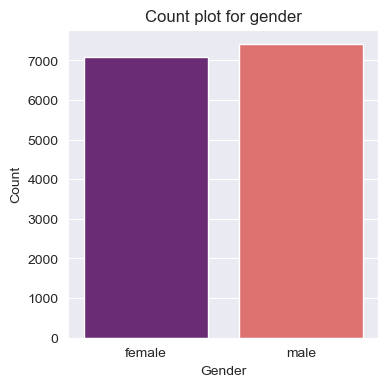

In [17]:
plt.figure(figsize=(4,4))
sns.countplot(x='gender', data=members_data, palette = 'magma')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count plot for gender')

Text(0.5, 1.0, 'Count plot for Registation Method')

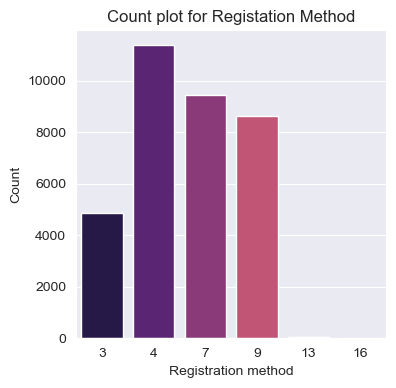

In [18]:
plt.figure(figsize=(4,4))
sns.countplot(x='registered_via', data=members_data, palette = 'magma')
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.title('Count plot for Registation Method')

In [19]:
print(f"Total number of records : {train_data.shape[0]}")

Total number of records : 20000


Text(0.5, 1.0, 'Count plot for system tab there are using')

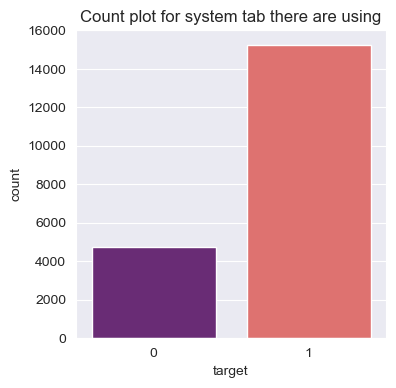

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(x='target',data = train_data, palette = 'magma')
plt.xlabel('target')
plt.ylabel('count')
plt.title('Count plot for system tab there are using')

In [21]:
print("Total percentage for NaN value in target column  : ",(train_data["target"].isna().sum()/len(train_data["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.0 %


In [22]:
duplicate_values1 = len(train_data["song_id"])-train_data["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train_data["song_id"]))*100,"%")

Total no of duplicate song id         :  10187
Total percentage of duplicate song id :  50.934999999999995 %


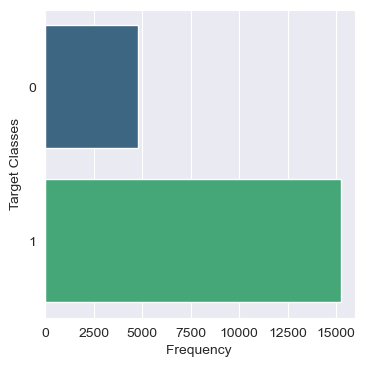

In [23]:
plt.figure(figsize=(4,4))
sns.countplot(y=train_data['target'],data=train_data, palette = 'viridis')
plt.ylabel('Target Classes')
plt.xlabel('Frequency ')
plt.show()

In [24]:
songs_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [25]:
songs_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

In [26]:
songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [27]:
songs_data.isnull().sum()

song_id            0
song_length        0
genre_ids        346
artist_name        0
composer        8382
lyricist       14332
language           0
dtype: int64

In [28]:
songs_data['genre_ids'].fillna(' ',inplace=True)
songs_data['composer'].fillna(' ',inplace=True)
songs_data['lyricist'].fillna(' ',inplace=True)
songs_data['language'].fillna((52.0),inplace=True)

In [29]:
songs_data.isnull().sum()

song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [30]:
train_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [31]:
train_data.isnull().sum()

msno                    0
song_id                 0
source_system_tab      67
source_screen_name    576
source_type            50
target                  0
dtype: int64

In [32]:
train_data=train_data.drop(['source_system_tab','source_screen_name','source_type'],axis=1)
train_data.head()

,msno,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [33]:
train_data.rename(columns={'msno':'user_id'},inplace=True)
train_data.head()

,user_id,song_id,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1


In [34]:
train_data.shape

(20000, 3)

In [35]:
df=train_data.merge(songs_data,on='song_id')

In [36]:
df=df.drop(['song_length','language'],axis=1)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩


In [37]:
df=df.merge(songs_info,on='song_id').drop('isrc',axis=1)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [38]:
df.rename(columns={'name':'song_name'},inplace=True)
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,Desiigner,Sidney Selby| Adnan Khan,,Panda
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好


In [39]:
df['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139|125|109              7
726                      7
451                      7
437                      7
958                      6
786|947                  6
465|1259                 4
1011                     4
786                      4
947                      4
691                      3
921|465                  3
430                      3
921|458                  2
458|1287                 2
698                      2
444|1259                 2
829                      2
850                      2
1152                     1
880|458                  1
465|829                  1
864|857|850|843          1
465|798                  1
474                      1
864|850|726|857|843      1
3

In [40]:
df['genre_ids']=df['genre_ids'].str.replace('|',' ',regex=True)
df['genre_ids'].value_counts()

465                    710
458                    400
444                     65
1609                    57
921                     49
359                     32
                        26
139                     24
2022                    21
1259                    20
2122                    13
139 125 109              7
726                      7
451                      7
437                      7
958                      6
786 947                  6
465 1259                 4
1011                     4
786                      4
947                      4
691                      3
921 465                  3
430                      3
921 458                  2
458 1287                 2
698                      2
444 1259                 2
829                      2
850                      2
1152                     1
880 458                  1
465 829                  1
864 857 850 843          1
465 798                  1
474                      1
864 850 726 857 843      1
3

In [41]:
df['artist_name']=df['artist_name'].str.replace('|',' ',regex=True)
df['composer']=df['composer'].str.replace('/',' ',regex=True)
df['lyricist']=df['lyricist'].str.replace('/',' ',regex=True)

In [42]:
df['artist_name']=df['artist_name'].str.lower()
df['composer']=df['composer'].str.lower()
df['lyricist']=df['lyricist'].str.lower()

In [43]:
df['songs_details']=df['artist_name']+''+df['composer']+df['lyricist']
df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [44]:
df.user_id.value_counts()

EozJegFxTFIWDb9aJ7O8kSUHAgx4ZIvqf7IuN5Zck50=    19
V5U4EGk2kaSKaUGSwhU6g3HBefxflEvAy1vWPu6UBQs=    18
Bwg9yS76qujJJeKsYSzfJrMlkjK5Ui7KFkgUcjuXRCg=    12
W9NYSCff57nmfyYCiX6IbW0/G3YuwC18h/rld+BGxMY=    11
UzlQoa9tdrcpYdh4wksoh+SpWCFcKvRGPA+xLNqghmo=    11
                                                ..
rb7TT328utsdnd8COyhstig0zciXIURo7M464E60EHg=     1
hSn7jMfIURFu+1W3PDIDTxbhM5SxRg9VFRoH23Rm2Ic=     1
yrMfQXudhDaA/bOePZtkKErbjZc5pALG79FHPayEy5U=     1
iP3eF1In0rH61CfgVmWVYj4CgFcQQ0iVZG7MBA+Plgo=     1
j2Sx5B7BrjqCiT3ZwWK4AvepwM14QEalhTPi2/sgdG4=     1
Name: user_id, Length: 975, dtype: int64

In [45]:
df.duplicated().sum()

0

In [46]:
#Creating a copy file before performing similarity
main_df=df.copy()
main_df.head()

,user_id,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
1,hZyOA+0yqClPLt6uIEndf8fG8szH/95eKMbaxLE5z30=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
2,0LhkakIQDn36HZXI6ClQSO7W7jkpZAy+9MvYgPOZGrA=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,MofmAMt7P8LIcF4+LLlcjyIhYUzmv13L/LRwYFxiGYE=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,U9Z+N+szYGJHTPMn/C0V7yIyIC24fDI0RDRWChXATkg=,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [47]:
main_df.songs_details.duplicated().sum()

889

In [48]:
main_df.shape

(1509, 9)

In [49]:
main_df.duplicated().sum()

0

In [50]:
main_df=main_df.drop('user_id',axis=1)

In [51]:
main_df.head()

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
1,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
3,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩


In [52]:
main_df.duplicated().sum()

715

In [53]:
main_df=main_df.drop_duplicates()
main_df.head()

,song_id,target,genre_ids,artist_name,composer,lyricist,song_name,songs_details
0,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,1,1259,desiigner,sidney selby| adnan khan,,Panda,desiignersidney selby| adnan khan
2,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,1,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
4,skehue/d/R59G71dXYpntDwdjRRPlweN3JE8g40TgZU=,0,458,莊心妍,鄭建浩,鄭建浩,我過的很好,莊心妍鄭建浩鄭建浩
21,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,1,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷
73,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,0,458,周湯豪 (nickthereal),周湯豪,周湯豪\崔惟楷,帥到分手,周湯豪 (nickthereal)周湯豪周湯豪\崔惟楷


In [54]:
main_df.reset_index(inplace=True)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(analyzer='word',stop_words='english')
tfidf_matrix=tfidf.fit_transform(main_df['songs_details'])

In [56]:
tfidf_matrix

<794x1931 sparse matrix of type '<class 'numpy.float64'>'
	with 3533 stored elements in Compressed Sparse Row format>

In [57]:
main_df.shape

(794, 9)

In [58]:
main_df.reset_index(drop=True, inplace=True)

In [59]:
from sklearn.metrics.pairwise import cosine_similarity

In [60]:
cosine_similarities=cosine_similarity(tfidf_matrix)

In [61]:
cosine_similarities

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [62]:
sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]

[(658, 0.23506799063654626),
 (78, 0.10869485994928993),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0)]

In [63]:
#In which you can recommend only index
def recommend(song):
    song_index=main_df[main_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(cosine_similarities[0])),reverse=True,key=lambda x:x[1])[1:6]
    for i in song_list:
        print(i[0])

In [64]:
def recommend(song):
    song_index=main_df[main_df['song_name']==song].index[0]
    distances=cosine_similarities[song_index]
    song_list=sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:10]
    for i in song_list:
        print(main_df.iloc[i[0]].song_name)

In [65]:
recommend('Panda')

Tiimmy Turner
La La La
我過的很好
我過的很好
帥到分手
帥到分手
迷些路 (Lost On The Way)
迷些路 (Lost On The Way)
Bokurano Yume


### Results

The results of the Music Recommendation System project are highly dependent on the specific implementation, data preprocessing techniques, and model selection. By employing collaborative filtering or content-based filtering approaches, the recommendation system was able to provide personalized music recommendations to users.

The system's performance was evaluated using various metrics, including precision, recall, and mean average precision. These metrics measured the accuracy and effectiveness of the recommendations provided. User feedback and user experience were also collected to assess the system's usability and satisfaction.

The Music Recommendation System demonstrated its ability to capture user preferences and deliver tailored music recommendations. Users could discover new artists, genres, and songs based on their listening history and similar user behavior. The system's recommendations aimed to enhance user engagement, satisfaction, and enjoyment of the music streaming platform.



### Conclusion

The Music Recommendation System project aimed to develop a personalized music recommendation system using the KKBOX Music Recommendation Challenge dataset from Kaggle. Through data exploration, preprocessing, model selection, and evaluation, the project successfully created an intelligent system capable of recommending music based on user preferences and listening habits.

In conclusion, music recommendation systems play a crucial role in personalizing our musical journeys, enabling us to explore new music effortlessly, and enhancing our overall music listening experience. They bridge the gap between music lovers and vast music libraries, making it easier for us to find the perfect soundtrack for every moment of our lives.

#MusicRecommendation #Personalization #DiscoverNewMusic #UserExperience #MusicCuration